In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv

directory = ("/content/drive/MyDrive/OCR Project(SMU)/Annotations_Simple_Test")
new_dir = ("/content/drive/MyDrive/OCR Project(SMU)/Annotations (txt)")
num = 10000
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".csv"):
        # filepath = os.path.join(directory, filename)
        csv_file = directory + '/'+ filename
        txt_file = new_dir + '/0'+ str(num) + ".txt"
        with open(txt_file, "w") as my_output_file:
            with open(csv_file, "r") as my_input_file:
                [my_output_file.write(" ".join(row) + "\n") for row in csv.reader(my_input_file)]
            my_output_file.close()
    num += 1

In [ ]:
import shutil
directory = ("/content/drive/MyDrive/OCR Project(SMU)/Images_Test")
new_dir = ("/content/drive/MyDrive/OCR Project(SMU)/Images")
num = 10000
for filename in sorted(os.listdir(directory)):
  if filename.endswith(".jpg"):
        # filepath = os.path.join(directory, filename)
        img_file = directory + '/'+ filename
        new_file = new_dir + '/0'+ str(num) + ".jpg"
        shutil.copy(img_file,new_file)
  num += 1
  if num%100 == 0:
    print(num)

In [ ]:
directory = ("/content/drive/MyDrive/OCR Project(SMU)/Images_Test")
new_dir = ("/content/drive/MyDrive/OCR Project(SMU)/Temp")

In [ ]:
test = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
for i in [36,9,9,21,21,19,14,29,10,12,30,9,15,6,21,27]:
  print(test[i])

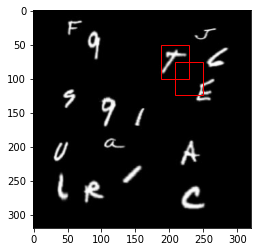

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open("/content/drive/MyDrive/OCR Project(SMU)/Images_Test/000000.jpg")

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
v1,v2,v3,v4 = 0.584375,	0.715625,	0.159375,	0.3125
w1 = (v2-v1) *320
h1 = (v4-v3) *320
xc = (v1+v2)/2
yc = (v3+v4)/2

rect = patches.Rectangle((v1*320, v3*320), width= w1, height= h1, linewidth=1, edgecolor='r', facecolor='none') # 0.31875	0.43125	0.55625	0.665625
rect2 = patches.Rectangle((xc*320, yc*320), width= w1, height= h1, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)

plt.show()

In [ ]:
import cv2
im = cv2.imread("/content/drive/MyDrive/OCR Project(SMU)/Images_Test/000000.jpg")
print(type(im))
print(im.shape)
test = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
print(test[29])

<class 'numpy.ndarray'>
(320, 320, 3)
T


**Convert Annotation from xmin ymin to yolo v5 format**

In [ ]:
import numpy as np
from numpy import genfromtxt
import os
dir = "/content/drive/MyDrive/OCR Project(SMU)/Annotations (txt)/"
num = 0
for filename in sorted(os.listdir(dir)):
  my_data = genfromtxt(dir + filename, delimiter=' ')
  x = np.copy(my_data)
  x[:,1] = (my_data[:,1] + my_data[:,2]) / 2 # Xc
  x[:,2] = (my_data[:,3] + my_data[:,4]) / 2 # yc
  x[:,3] = my_data[:,2] - my_data[:,1]
  x[:,4] = my_data[:,4] - my_data[:,3]
  new_dir = ("/content/drive/MyDrive/OCR Project(SMU)/Annotations_corrected/")
  np.savetxt(new_dir+filename.replace('csv','txt'), x, fmt = ['%d','%1.6f','%1.6f','%1.6f','%1.6f',], delimiter=' ')
  num += 1
  if num %100 == 0:
    print(num)

In [ ]:
import os
dir = "/content/drive/MyDrive/OCR Project(SMU)/Annotations (txt)/"
sorted(os.listdir(dir))[0].replace('csv','txt')

'000000.txt'

[['1', '0.868750', '0.309375', '0.187500', '0.093750'], ['23', '0.603125', '0.368750', '0.181250', '0.162500'], ['20', '0.550000', '0.200000', '0.118750', '0.175000'], ['14', '0.421875', '0.681250', '0.193750', '0.137500'], ['21', '0.743750', '0.550000', '0.125000', '0.156250'], ['21', '0.528125', '0.825000', '0.143750', '0.106250'], ['17', '0.860938', '0.596875', '0.090625', '0.150000'], ['16', '0.310937', '0.884375', '0.153125', '0.150000'], ['20', '0.796875', '0.717188', '0.125000', '0.084375'], ['44', '0.237500', '0.643750', '0.131250', '0.081250'], ['39', '0.290625', '0.323438', '0.106250', '0.096875'], ['0', '0.712500', '0.140625', '0.193750', '0.143750'], ['5', '0.639062', '0.712500', '0.096875', '0.093750'], ['18', '0.420312', '0.085938', '0.128125', '0.084375'], ['31', '0.079687', '0.882812', '0.128125', '0.103125'], ['16', '0.064062', '0.740625', '0.128125', '0.112500'], ['32', '0.085938', '0.187500', '0.096875', '0.118750']]


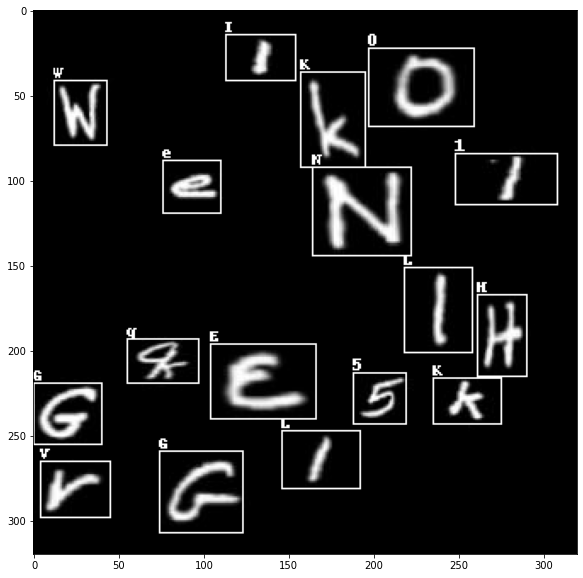

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

class_id_to_name_mapping = {}
test = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
for i in range(len(test)):
  class_id_to_name_mapping[i] = test[i]


def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = "/content/drive/MyDrive/OCR Project(SMU)/Annotations_corrected/009000.txt"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    print(annotation_list)
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Load the image
image_file = "/content/drive/MyDrive/OCR Project(SMU)/Images_20k/009000.jpg"
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [ ]:
class_id_to_name_mapping

In [ ]:
import os
import shutil
directory = ("/content/drive/MyDrive/OCR Project(SMU)/Images_20k")
new_dir = ("/content/drive/MyDrive/OCR Project(SMU)/emnist_1k/images")
num = 0
for filename in sorted(os.listdir(directory)):
  if filename.endswith(".jpg"):
        # filepath = os.path.join(directory, filename)
        img_file = directory + '/'+ filename
        new_file = new_dir + '/'+ filename
        shutil.copy(img_file, new_file)
  num += 1
  if num%100 == 0:
    print(num)
  if num == 1000:
      break

Image Augmentation

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
num = 0
def change_color(image_name):
  dir = "/content/drive/MyDrive/OCR Project(SMU)/Images_20k/"
  im = Image.open(dir + image_name)
  im = im.convert('RGB')
  data1 = np.array(im)
  rr,rg,rb = random.randint(30,220),random.randint(30,220),random.randint(30,220)
  ri1,ri2,ri3 = random.randint(50,100),random.randint(50,100),random.randint(50,100)# random increase/decrease
  wr,wg,wb = rr+ri1 if rr+ri1 <=255 else rr-ri1, rg+ri2 if rg+ri2 <=255 else rg-ri2, rb+ri3 if rb+ri3 <=255 else rb-ri3
  thres = random.randint(120,200)  # min:120 max:200
  for x in range(320):
    for y in range(320):
      z = data1[x][y]
      if z[0]<=thres and z[1] <=thres and z[2] <=thres:
        data1[x][y] = [rr,rg,rb]
      else:
        data1[x][y] = [wr,wg,wb]
  new_dir = "/content/drive/MyDrive/OCR Project(SMU)/images_coloured/"
  im_new = Image.fromarray(data1)
  im_new.save(new_dir + image_name)
# plt.rcParams["figure.figsize"] = (10,10)
# plt.imshow(data1)
# plt.show()

In [ ]:
import os
import shutil
import random
num = 0
dir = "/content/drive/MyDrive/OCR Project(SMU)/Images_20k/"
new_dir = "/content/drive/MyDrive/OCR Project(SMU)/images_coloured/"
for filename in sorted(os.listdir(dir)):
  if filename.endswith(".jpg"):
    if num>=18000:
      shutil.copy(dir+filename, new_dir+filename)
    else:
      change_color(filename)
    num+=1
  if num % 200 == 0:
    print(num)

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


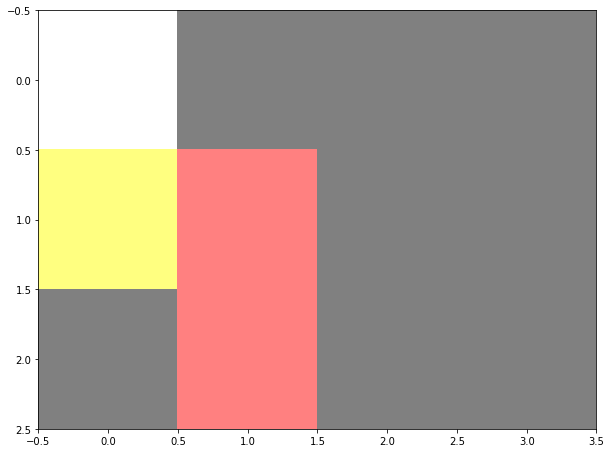

In [ ]:
test = np.array([
                 [[255,255,255],[0,0,0],[0,0,0],[0,0,0]],
                  [[255,69,0],[50,0,0],[0,0,0],[0,0,0]],
                  [[0,0,0],[255,0,0],[0,0,0],[0,0,0]],
                 ]
                  )
plt.imshow(test)
plt.show()

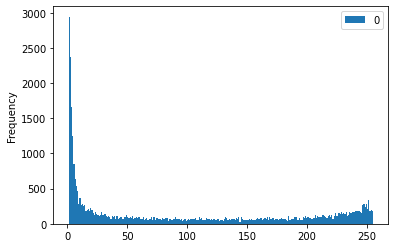

In [ ]:
import pandas as pd
x = data[data!=0].flatten()
pd.DataFrame(x).plot.hist(bins=255)

Test model